# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue
<br> _(The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over)_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Check number of rows and columns of initial dataset
df.shape

(10866, 21)

In [4]:
# Check value types and number of non-null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> * There are some inappropriate columns in the dataset, which may not useful for analysis like id, imdb_id, original_title, cast, homepage, tagline, director, keywords, production_companies, release_date, overview. These columns should be dropped.

### Drop unnecessary columns

In [5]:
# drop unnecessary columns
df.drop(columns =['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'tagline', 'director',
                  'keywords', 'production_companies', 'release_date', 'overview'], inplace=True)

# check number of columns after drop columns
df.shape

(10866, 10)

In [6]:
# check number of null value in columns
df.isnull().sum()

popularity       0
budget           0
revenue          0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

> * Genres column, which contains null value but is considered an analytical column. It should be removed some rows contains null values.

### Drop rows contains null values

In [7]:
# drop rows contain null value in genres column
df = df[df['genres'].notna()]

# checks if any of columns have null values - should print False
df.isnull().sum().any()

False

### Check duplicates and drop 

In [8]:
#check if any duplicate in dataset
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

#check number of duplicates again to confirm dedupe
df.duplicated().sum()

0

In [10]:
# check number of rows and columns after dedupe
df.shape

(10842, 10)

In [11]:
# Check numeric column statistics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> * There are movies with budget 0, revenue 0 or runtime 0, which is abnormal. These case should be removed from dataset.

### Remove rows with invalid value

In [12]:
# create df with only rows has budget=0 or revenue=0 or runtime=0
df_abnormal = df.query('budget==0 or revenue==0 or runtime==0')

#drop rows in df by index of df contains abnormal cases
df.drop(df_abnormal.index, axis=0, inplace=True)
df.shape

(3854, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    3854 non-null   float64
 1   budget        3854 non-null   int64  
 2   revenue       3854 non-null   int64  
 3   runtime       3854 non-null   int64  
 4   genres        3854 non-null   object 
 5   vote_count    3854 non-null   int64  
 6   vote_average  3854 non-null   float64
 7   release_year  3854 non-null   int64  
 8   budget_adj    3854 non-null   float64
 9   revenue_adj   3854 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 331.2+ KB


> * Now, dataset has 3854 non-null rows and 10 columns for analysis. All columns also has appropriate data types.

### Check unique values

In [14]:
#check number of unique value of each columns
df.nunique()

popularity      3852
budget           407
revenue         3753
runtime          139
genres          1053
vote_count      1274
vote_average      53
release_year      56
budget_adj      2096
revenue_adj     3848
dtype: int64

### Numeric columns statistics and values distribution

[]

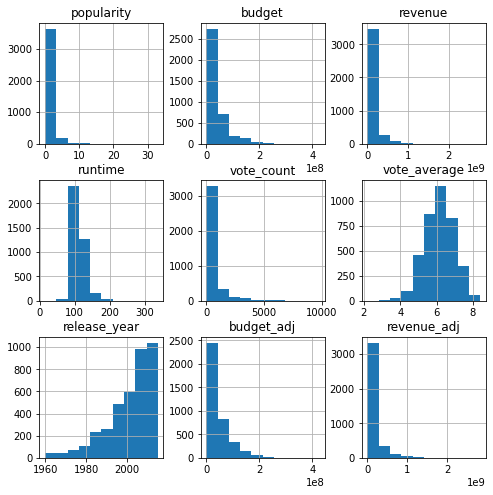

In [15]:
df.hist(figsize=(8,8))
plt.plot()

In [16]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
df.skew(axis=0, skipna=True)

popularity      7.487815
budget          2.381736
revenue         4.274010
runtime         1.625449
vote_count      3.788627
vote_average   -0.282213
release_year   -1.153330
budget_adj      1.964175
revenue_adj     4.046393
dtype: float64

> * Average popularity is 1.19, while max popularity is 32.9. Popularity values is mostly from 0 to 1.5.
> * Average budget is 37.2 mil; but max is 425 mil. Values range mostly from 1  to 50 mil.
> * While average revenue is 107 mil; but max is 2.7 bil. Values range mostly from 13.6 mil to 124 mil.
> * Average runtime is 109 min; but max is 338 min. Runtime values mostly range from 95-119 min.
> * Average vote_count is 528 times, max is 9767 times. Almost values range from 71-590 times.
> * Average vote is 6.1, max is 8.4. Main range is 5.7-6.7.
> * All movies of this cleaned dataset were released from 1960 to 2015.
> * Almost of column value distribution is much right skew. Except for vote_average is left skew.

<a id='eda'></a>
## Exploratory Data Analysis

###  Which genres are most popular from year to year? 
> * Genres column contain multiple values separated by pipe (|) characters. So as to easily analyze for this question, should split each row into multiple rows correspond with multiple values.

In [18]:
# Work on a sub df only contains popularity, genres, release_year columns
df_popularity = df[['genres','popularity','release_year']]
df_popularity.head(3)

,genres,popularity,release_year
0,Action|Adventure|Science Fiction|Thriller,32.985763,2015
1,Action|Adventure|Science Fiction|Thriller,28.419936,2015
2,Adventure|Science Fiction|Thriller,13.112507,2015


In [19]:
# create function to split each row into multiple rows correspond to multiple values
def split_row(df, col_names, seperater):
    dataframe = df[col_names].str.split(seperater, expand=True).stack().reset_index(level=0)
    dataframe = dataframe.set_index('level_0').rename(columns={0:col_names})
    dataframe = dataframe.join(df.drop(col_names, axis=1))
    return dataframe

In [20]:
# Use split_row function to split each line into multiple lines correspond to multiple genres values
df_popularity_split = split_row(df_popularity, 'genres', '|')
df_popularity_split.head(6)

,genres,popularity,release_year
0,Action,32.985763,2015
0,Adventure,32.985763,2015
0,Science Fiction,32.985763,2015
0,Thriller,32.985763,2015
1,Action,28.419936,2015
1,Adventure,28.419936,2015


In [21]:
# create function to groupby and get mean value of specific column
def groupby_mean_value(df, groupby_cols, mean_col):
    dataframe = df.groupby(groupby_cols)[mean_col].mean()
    dataframe = dataframe.reset_index(name=mean_col)
    return dataframe

In [22]:
# Use groupby_mean_value to groupby to get the mean popularity for each genres by year
df_popularity_mean = groupby_mean_value(df_popularity_split, ['genres','release_year'], 'popularity')
df_popularity_mean.head()

,genres,release_year,popularity
0,Action,1960,1.504538
1,Action,1961,0.464139
2,Action,1962,1.848380
3,Action,1963,1.357698
4,Action,1964,3.153791


In [23]:
# create function to create dataframe with rows contains highest value of a specific column by group of other columns
def create_df_highest_value_by_group(df, group_cols, highest_value_col):
    highest_value_col_max = highest_value_col+'_max'
    df[highest_value_col_max] = df.groupby(group_cols)[highest_value_col].transform(max)
    dataframe = df.loc[df[highest_value_col] == df[highest_value_col_max]]
    dataframe = dataframe.sort_values(by=group_cols, ascending=True).reset_index().drop(columns =['index',highest_value_col_max])
    return dataframe

In [24]:
# use function create_df_highest_value_by_group to select most popularity of each year
df_popularity_most = create_df_highest_value_by_group(df_popularity_mean, ['release_year'], 'popularity')
df_popularity_most.head()

,genres,release_year,popularity
0,Thriller,1960,2.610362
1,Horror,1960,2.610362
2,Animation,1961,2.631987
3,Thriller,1962,3.170651
4,Adventure,1963,1.586280


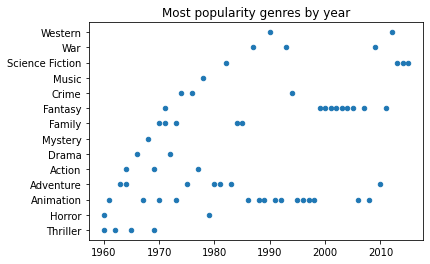

In [25]:
# Use scatter plot to show change in the most popularity genres each year
df_popularity_most.plot(x="release_year", y="genres", kind="scatter");
plt.title('Most popularity genres by year')
plt.xlabel('')
plt.ylabel('');
plt.show()

> * Most popularity genres changed over year, but some genres remain the most popularity during several years continously. Animations is the most popularity in the 1990s, after that the one is Fantasy in the first decade of 2000 millenium.

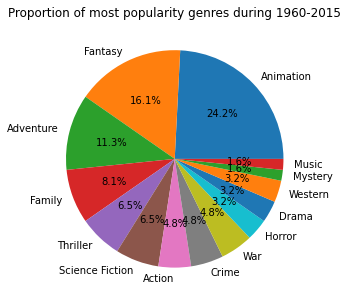

In [26]:
# use pie chart to show proportions of each genres
df_popularity_most['genres'].value_counts().plot.pie(autopct='%0.1f%%', figsize = (5,5))
plt.title('Proportion of most popularity genres during 1960-2015')
plt.ylabel('')
plt.show()

> * During 1960-2015, Animation is the most popularity genres, come after that Fantasy and Adventure is among 3 most general genres chosen by voter.

### What genres are the highest revenue over year? Any different from the highest vote genres?

In [27]:
# Work on a sub df only contains revenue, genres, release_year columns
df_revenue = df[['genres','revenue','release_year']]

# Use split_row function to split each line into multiple lines correspond to multiple genres values
df_revenue_split = split_row(df_revenue, 'genres', '|')

# Use groupby_mean_value functionn to groupby to get the mean revenue for each genres by year
df_revenue_mean = groupby_mean_value(df_revenue_split, ['genres','release_year'], 'revenue')

# use function create_df_highest_value_by_group to select highest revenue of each year
df_revenue_highest = create_df_highest_value_by_group(df_revenue_mean, ['release_year'], 'revenue')
df_revenue_highest.head()

,genres,release_year,revenue
0,History,1960,60000000.0
1,Animation,1961,215880014.0
2,History,1962,70000000.0
3,War,1962,70000000.0
4,Action,1963,44449382.5


In [28]:
# Work on a sub df only contains vote_average, genres, release_year columns
df_vote = df[['genres','vote_average','release_year']]

# Use split_row function to split each line into multiple lines correspond to multiple genres values
df_vote_split = split_row(df_vote, 'genres', '|')

# Use groupby_mean_value functionn to groupby to get the mean vote_average for each genres by year
df_vote_mean = groupby_mean_value(df_vote_split, ['genres','release_year'], 'vote_average')

# use function create_df_highest_value_by_group to select highest vote_average of each year
df_vote_highest = create_df_highest_value_by_group(df_vote_mean, ['release_year'], 'vote_average')
df_vote_highest.head()

,genres,release_year,vote_average
0,Horror,1960,8.0
1,Thriller,1960,8.0
2,Romance,1961,7.4
3,Crime,1962,7.7
4,Mystery,1963,7.5


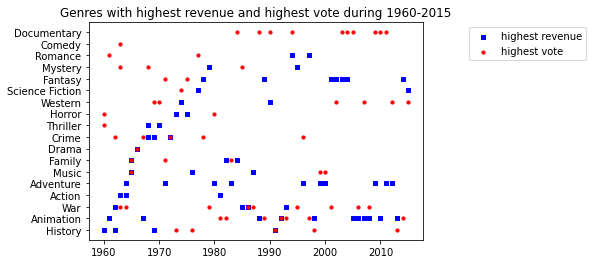

In [29]:
# Use scatter plot to show change in the highest revenue genres and highest vote genres each year
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df_revenue_highest.release_year, df_revenue_highest.genres, s=10, c='b', marker="s", label='highest revenue')
ax1.scatter(df_vote_highest.release_year, df_vote_highest.genres, s=10, c='r', marker="o", label='highest vote')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1));
plt.title('Genres with highest revenue and highest vote during 1960-2015')
plt.show()

> * Highest revenue genres change over year, but there is no or a little change in some periods. Adventure is the highest revenue genre in 2000s, then the one is Fantasy in the middle of 2000s. After that Animation and Adventure are the highest revenue genres in the late 2000s and in the begining of 2010s.
> * Highest vote genres also change over year during 1960-2015. Just a few genres is the highest vote and the highest revenue genre of the same year. In most year, highest vote genre and highest revenue genre are not the same.  Suprisingly, Documentary is the highest one continuously in several year of 2000s.

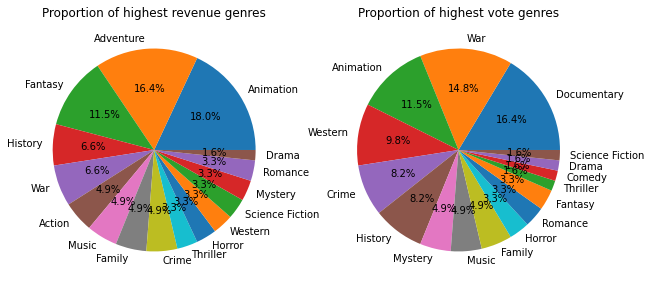

In [30]:
# use pie chart to show proportions of each genres
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

value1 = df_revenue_highest['genres'].value_counts().to_frame()
ax1.pie(value1.genres, labels=value1.index, autopct='%0.1f%%') #plot first pie
ax1.set_title('Proportion of highest revenue genres')

value2 = df_vote_highest['genres'].value_counts().to_frame()
ax2.pie(value2.genres, labels=value2.index, autopct='%0.1f%%') #plot second pie
ax2.set_title('Proportion of highest vote genres')

plt.show()

> * Animation, Adventure and Fantasy account for the large proportion of the highest revenue genres in 1960-2015. While Documentary, War and Animation contribute mostly of the percentage over year of the highest vote genres.

### How number of vote, revenue and budget changes over time?

In [31]:
# add column decade
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head(2)

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s


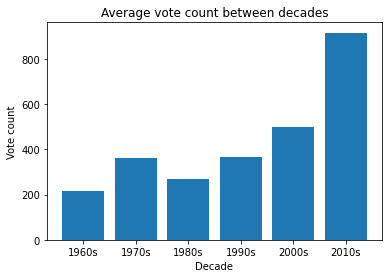

In [32]:
# Draw the bar chart for the change of the vote count
vote_count = df.groupby(['decade']).vote_count.mean()

plt.bar(vote_count.index, vote_count.values)
plt.title('Average vote count between decades')
plt.xlabel('Decade')
plt.ylabel('Vote count')

plt.show()

> * Overall, vote count highly increase for movies released from 1960s-2010s. For those movies released in 1960s-1990s, the number of vote fluctuate a lot. As it rise in 11960s-1970s then decrease in 1980s, after that increase steadily.

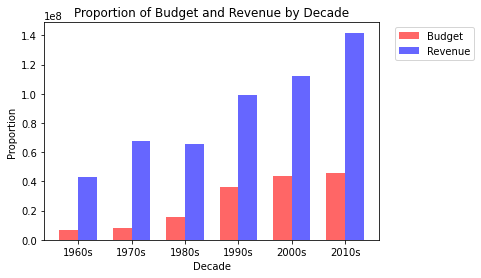

In [33]:
# Draw the bar chart for the change of the vote count
budget = df.groupby(['decade']).budget.mean()
revenue = df.groupby(['decade']).revenue.mean()

ind = np.arange(len(budget))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
budget_bars = plt.bar(ind, budget, width, color='r', alpha=.6, label='Budget')
revenue_bars = plt.bar(ind + width, revenue, width, color='b', alpha=.6, label='Revenue')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Decade')
plt.title('Proportion of Budget and Revenue by Decade')
locations = ind + width / 2  # xtick locations
labels =  ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

> * Budget and revenue overall increase fom year to year. While budget steadily increase by year, revenue slightly decrease in 1980s.

### What kinds of properties are associated with movies that have high revenues?

In [34]:
df.revenue.describe()

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

> * Consider that movies, which had revenue higher than 75th percentile revenues, are the high revenue movies.

In [35]:
# create df with only movies with high revenue
df_high_revenue = df.query('revenue > revenue.quantile(0.75)')
df_high_revenue.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,964.000000,9.640000e+02,9.640000e+02,964.000000,964.000000,964.000000,964.000000,9.640000e+02,9.640000e+02
mean,2.322729,7.903702e+07,3.197611e+08,116.188797,1348.751037,6.402178,2003.652490,8.797132e+07,3.845190e+08
std,2.321547,5.578593e+07,2.473609e+08,21.468895,1326.016459,0.704064,9.210281,5.523180e+07,3.014625e+08
min,0.131526,1.500000e+04,1.242721e+08,72.000000,14.000000,4.200000,1961.000000,1.577503e+04,1.161215e+08
25%,1.136057,3.700000e+07,1.653347e+08,100.000000,466.750000,5.900000,1998.000000,4.497495e+07,1.959012e+08
50%,1.725160,6.700000e+07,2.321503e+08,114.000000,871.500000,6.400000,2006.000000,7.793032e+07,2.839529e+08
75%,2.687781,1.100000e+08,3.682613e+08,129.250000,1757.500000,6.900000,2011.000000,1.208081e+08,4.659600e+08
max,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [36]:
# use correlation heatmap to see correlation between revenue and other columns
corr = df_high_revenue[['revenue','popularity','budget','runtime','vote_count','vote_average']].corr()
corr.style.background_gradient(cmap='coolwarm')

,revenue,popularity,budget,runtime,vote_count,vote_average
revenue,1.000000,0.511673,0.557030,0.246599,0.676351,0.297338
popularity,0.511673,1.000000,0.313969,0.221397,0.695962,0.380257
budget,0.557030,0.313969,1.000000,0.222530,0.449175,-0.038839
runtime,0.246599,0.221397,0.222530,1.000000,0.320553,0.401609
vote_count,0.676351,0.695962,0.449175,0.320553,1.000000,0.517863
vote_average,0.297338,0.380257,-0.038839,0.401609,0.517863,1.000000


> * From correlation map, can see that most of columns has positive correlation with revenue. 
> * Popularity, budget, vote_count has high correlation with revenue. Whilst vote_count has the highest correlation ~0.67.
> * Runtime and vote average are less related to revenue.

<a id='conclusions'></a>
## Conclusions
_The analyzed dataset is small with only 3854 rows after cleaning, compare to the initial dataset with 10866 rows. These findings may not prepresent for the whole initial dataset._

> * During 1960-2015, the most popularity genres change over year, but in some period, it remain the same. Animation, Fantasy and Adventure contribute to the most popularity genres chosen by voter.
> 
>
> * Highest revenue genres and highest vote genres also change over year, while some genres show the same continuously in 2000s and 2010s. Those highest revenue genres, accounted for the majority of proportion, are also the same as those most popularity genres. 
> * Whilst, less popularity genres Documentary and War, along with most popularity genre Animation,  contribute to most of percentage of the highest vote.
>
>
> * The number of voter for movies released in 1960-2015 has an overall increase. While movies released in 1960s and 1980s are less interested by voter.
> * Budget and revenue also increase from year to year. But, the trend of revenue somehow is the same as trend of vote count, revenue also slightly decrease in 1980s then rise over year later decade. Whilst, budget steadily increase in 1960s-2010s.
>
>
> * Among movies has highest revenue, popularity, budget, vote_count has strong positive correlation with revenue and vote_count has the strongest correlation. 